Below is inferential techniques used on the capstone 1 data set.


In [1]:
# Importing all packages used for the analysis
#Data Cleaning and Exploratory Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Math functions used for feature engineering
from math import log

#Data manipulation
import re

%matplotlib inline
sns.set()
sns.set_context("notebook", font_scale=1.5)

In [2]:
#Importing the data
#importing file - saved file as csv file and then read it
df = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
#attribute to get column names
print(df.columns)
print('=====================================')
#shape of the data
print('Data Shape:',df.shape)
print('=====================================')

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Data Shape: (30000, 25)


In [3]:
#renaming 'default payment next month' to 'default'
df['default'] = df['default payment next month']
df.drop(['default payment next month'], 1, inplace=True)

#rename column PAY_0 to PAY_1 for uniformity
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

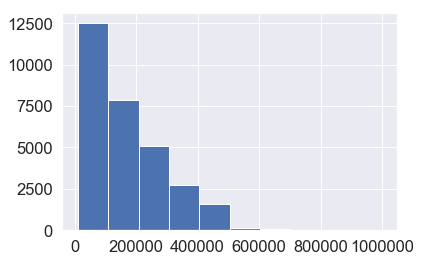

In [5]:
plt.hist(df['LIMIT_BAL'])

(array([1.4000e+01, 1.0585e+04, 0.0000e+00, 1.4030e+04, 0.0000e+00,
        4.9170e+03, 1.2300e+02, 0.0000e+00, 2.8000e+02, 5.1000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

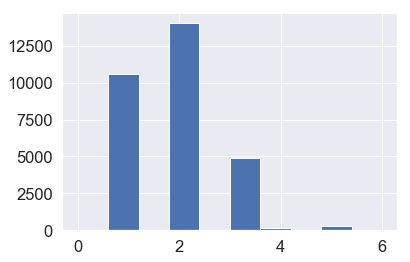

In [7]:
plt.hist(df['EDUCATION'])

(array([11888.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18112.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

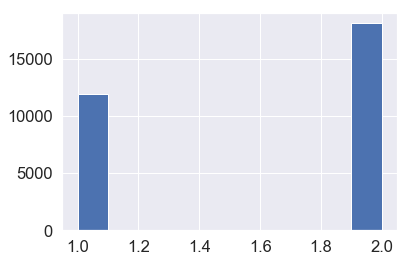

In [8]:
plt.hist(df['SEX'])

In [29]:
#Limit balances are significantly corellated with default
corr_DF_1 = pd.DataFrame(index = df.index)
corr_DF_1['SEX'] = df['SEX']
corr_DF_1['AGE'] = df['AGE']
corr_DF_1['EDUCATION'] = df['EDUCATION']
corr_DF_1['default'] = df['default']
corr_DF_1['LIMIT_BAL'] = df['LIMIT_BAL']
corr_DF_1.corr()

,SEX,AGE,EDUCATION,default,LIMIT_BAL
SEX,1.000000,-0.090874,0.014232,-0.039961,0.024755
AGE,-0.090874,1.000000,0.175061,0.013890,0.144713
EDUCATION,0.014232,0.175061,1.000000,0.028006,-0.219161
default,-0.039961,0.013890,0.028006,1.000000,-0.153520
LIMIT_BAL,0.024755,0.144713,-0.219161,-0.153520,1.000000


In [28]:
#As we can see below, the payments defaults are heavily corellated with whether the customer defaults or not
corr_DF_2 = pd.DataFrame(index = df.index)
corr_DF_2 = df[['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default']].copy()
corr_DF_2.corr()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
PAY_0,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.324794
PAY_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.263551
PAY_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.235253
PAY_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.216614
PAY_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.204149
PAY_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.186866
default,0.324794,0.263551,0.235253,0.216614,0.204149,0.186866,1.000000


In [31]:
#As we can see below, the bill amounts are not very significantly corellated with default
#perhaps a mean of the bill amounts would be more significant
corr_DF_3 = pd.DataFrame(index = df.index)
corr_DF_3 = df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default']].copy()
corr_DF_3['MEAN_BILL'] = (corr_DF_3['BILL_AMT1']+corr_DF_3['BILL_AMT2']+corr_DF_3['BILL_AMT3']+corr_DF_3['BILL_AMT4']+corr_DF_3['BILL_AMT5']+corr_DF_3['BILL_AMT6'])/6
corr_DF_3.corr()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default,MEAN_BILL
BILL_AMT1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,-0.019644,0.940100
BILL_AMT2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,-0.014193,0.961178
BILL_AMT3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,-0.014076,0.961958
BILL_AMT4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,-0.010156,0.964501
BILL_AMT5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,-0.006760,0.951676
BILL_AMT6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,-0.005372,0.928720
default,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,1.000000,-0.012691
MEAN_BILL,0.940100,0.961178,0.961958,0.964501,0.951676,0.928720,-0.012691,1.000000


(array([1.6188e+04, 1.2676e+04, 9.8500e+02, 1.4000e+02, 9.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-157264. ,   24871.3,  207006.6,  389141.9,  571277.2,  753412.5,
         935547.8, 1117683.1, 1299818.4, 1481953.7, 1664089. ]),
 <a list of 10 Patch objects>)

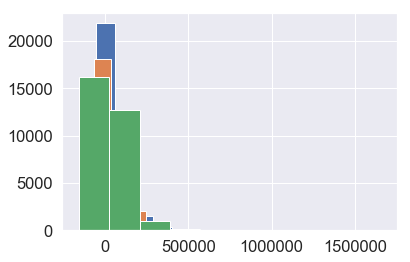

In [12]:
plt.hist(df['BILL_AMT1'])
plt.hist(df['BILL_AMT2'])
plt.hist(df['BILL_AMT3'])

In [22]:
#Is the Bill amount normally distributed ?

In [14]:
#Bill Amount Means
print('Mean:', df['BILL_AMT1'].mean())
print('Std:', df['BILL_AMT1'].std())

Mean: 51223.3309
Std: 73635.86057552956


In [17]:
new_df = pd.DataFrame(index = df.index)
new_df['BILL_AMT1'] = df['BILL_AMT1']

Mean of Bill Amounts: 51223.3309


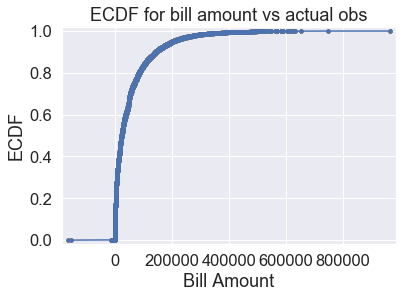

Bootstrap replicates (mean) for bill Amounts: 51221.08841709666
Second Bootstrap replicates (mean) for bill AMounts: 51222.988206049995
We get different means for different random samples.


In [19]:
#function -  ecdf: helper method to chart ECDF graphs
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
#function : bootstrap
def bootstrp_replicate(data,func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

print('Mean of Bill Amounts:',new_df['BILL_AMT1'].mean())
bs_mean = []
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(new_df['BILL_AMT1'], size=len(new_df['BILL_AMT1']))
    #print(np.mean(bs_sample))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

x, y = ecdf(new_df['BILL_AMT1'])
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('Bill Amount')
_ = plt.ylabel('ECDF')
_=plt.title('ECDF for bill amount vs actual obs')    
plt.show()


bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrp_replicate(new_df['BILL_AMT1'], np.mean)

print("Bootstrap replicates (mean) for bill Amounts:",bs_replicates.mean())

bs_replicates_2 = np.empty(10000)
for i in range(10000):
    bs_replicates_2[i] = bootstrp_replicate(new_df['BILL_AMT1'], np.mean)
    
print("Second Bootstrap replicates (mean) for bill AMounts:",bs_replicates_2.mean())
print('We get different means for different random samples.')


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


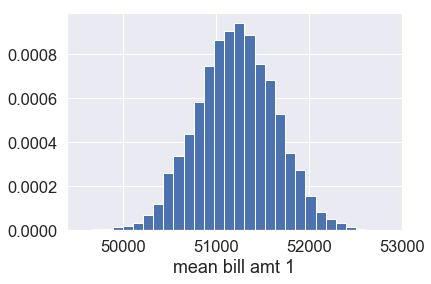

Visually, the two histograms are not very different from each other.


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


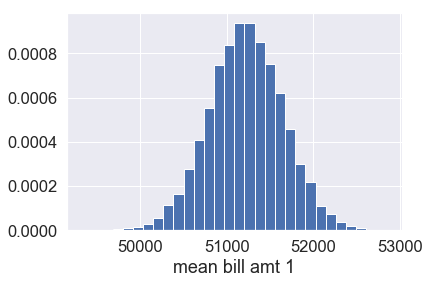

In [20]:
_ = plt.hist(bs_replicates, bins = 30, normed = True)
_ = plt.xlabel('mean bill amt 1')
plt.show()

print('Visually, the two histograms are not very different from each other.')

_ = plt.hist(bs_replicates_2, bins = 30, normed = True)
_ = plt.xlabel('mean bill amt 1')
plt.show()